In [1]:
import sys
# sys.path.append() 
print(sys.path)

['/Users/apple/Desktop/慕课/机器学习/myML', '/Users/apple/opt/anaconda3/lib/python37.zip', '/Users/apple/opt/anaconda3/lib/python3.7', '/Users/apple/opt/anaconda3/lib/python3.7/lib-dynload', '', '/Users/apple/opt/anaconda3/lib/python3.7/site-packages', '/Users/apple/opt/anaconda3/lib/python3.7/site-packages/aeosa', '/Users/apple/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/apple/.ipython']


In [2]:
from linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lin = LinearRegression()

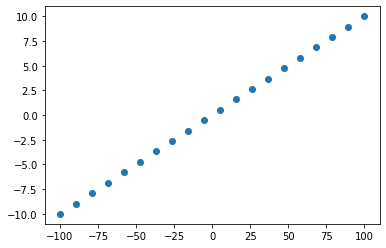

In [396]:
X = np.empty((20,2))
y = np.empty((20,1))
X[:,0] = np.linspace(-100,100,20)
X[:,1] = np.linspace(-10,10,20)
plt.scatter(X[:,0],X[:,1])
# y = X[:,0]*0 + X[:,1]*4 + np.random.uniform(-2,2,20)
# y = y.reshape(-1,1)
# y

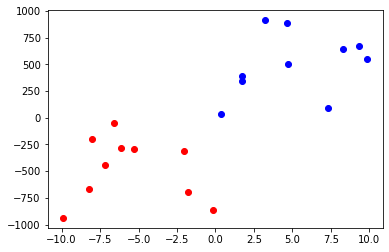

In [415]:
X = np.empty((20,2))
y = np.empty((20,1))
X[:10,0] = np.random.uniform(-10,0,size=10)
X[10:,0] = np.random.uniform(0,10,10)
X[:10,1] = np.random.uniform(-1000,0,10)
X[10:,1] = np.random.uniform(0,1000,10)
y[:10] = 0
y[10:] = 1

plt.scatter(X[y[:,0]==0,0],X[y[:,0]==0,1],color='red')
plt.scatter(X[y[:,0]==1,0],X[y[:,0]==1,1],color='blue')

In [488]:
class LogisticRegression():
    def __init__(self):
        self.coef_=None
        self.intercept_=None
        self._theta=None
        self.multi_class=None
        self.C=1.
        self.penalty='l2'
        self.max_iter=1e4
    
    def __repr__(self):
        print("LogisticRegression()")
    
    def fit(self,X_train,y_train,learning_rate=0.01):
        """根据训练集X_train,y_train训练逻辑回归模型"""
        assert X_train.shape[0]==y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
            
        def sigmoid(t):
            return 1/(1+np.exp(-t))
        
        def J(theta,X):
            return np.sum(y*sigmoid(X.dot(theta))+(1-y)*sigmoid(1-X.dot(theta)))/(-len(X))
        
        def dJ(theta,X):
            return X.T.dot(sigmoid(X.dot(theta))-y)/len(X)
        
        def dJ_debug(w,X,epsilon=1e-4):
            res=np.zeros_like(w)
            for i in range(len(w)):
                w_1=w.copy()
                w_1[i]+=epsilon
                w_2=w.copy()
                w_2[i]-=epsilon
                res[i]=( J(w_1,X) - J(w_2,X) ) / ( 2 * epsilon )
            return res
        
        def gredient(dJ_func,w,X):
            i_iter=0
            while(i_iter < self.max_iter):
                last_J=J(w,X)
                w=w-learning_rate*dJ_func(w,X)
                if(J(w,X)-last_J<1e-4):
                    break
                i_iter+=1
            return w
        
        X_b=np.hstack((np.ones(X_train.shape[0]).reshape(-1,1),X_train))
        theta=np.zeros((X_b.shape[1],1))
        gredient=gredient(dJ,theta,X_b)
        self._theta=gredient
        self.coef_=self._theta[1:]
        self.intercept_=self._theta[0]
            
        return self
    
    def predict(self,X_test):
        """根据测试集X_test预测y_predict"""
        assert self._theta is not None,\
            "you must fit before predict"
        def sigmoid(t):
            return 1/(1+np.exp(-t))
        X_b=np.hstack((np.ones(X_test.shape[0]).reshape(-1,1),X_test))
        y_predict=np.array(sigmoid(X_b.dot(self._theta))>0.5,dtype=int)
        return y_predict
    
    def score(self,X_test,y_test):
        """根据测试集X_test,y_test计算准确度"""
        assert X_test.shape[0]==y_test.shape[0], \
            "the size of X_test must be equal to the size of y_test"
        def sigmoid(t):
            return 1/(1+np.exp(-t))
        X_b=np.hstack((np.ones(X_test.shape[0]).reshape(-1,1),X_test))
        y_predict=np.array(sigmoid(X_b.dot(self._theta))>0.5,dtype=int)
        return np.sum(y_predict==y_test)/len(y_test)

In [491]:
lin = LogisticRegression2()
lin.fit(X,y)
print(lin.score(X,y))

1.0


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: overflow encountered in exp


In [487]:
from sklearn.linear_model import LogisticRegression

lin2 = LogisticRegression()
lin2.fit(X,y)
print(lin2._theta)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'LogisticRegression' object has no attribute '_theta'

In [ ]:
array([[0.99380799, 0.0993808 , 0.0496904 ],
       [0.99380799, 0.0993808 , 0.0496904 ]])

In [63]:
lin = Lasso(1)
lin.fit(X,y,learning_rate=0.000000001)
y_predict = lin.predict(X)
print(y_predict)

[[-103.96992251]
 [ -92.92045953]
 [ -81.87099656]
 [ -70.82153359]
 [ -59.77207062]
 [ -48.72260765]
 [ -37.67314468]
 [ -26.6236817 ]
 [ -15.57421873]
 [  -4.52475576]
 [   6.52470721]
 [  17.57417018]
 [  28.62363316]
 [  39.67309613]
 [  50.7225591 ]
 [  61.77202207]
 [  72.82148504]
 [  83.87094801]
 [  94.92041099]
 [ 105.96987396]]


In [104]:
from sklearn.preprocessing import MinMaxScaler
lin2 = MinMaxScaler()
# print(lin2.t)
lin2.fit(X[np.arange(1,20,2)])
X_transform2 = lin2.transform(X[np.arange(2,20,2)])
print(X_transform2)



[[ 3.48336184e-01  2.02464316e-01]
 [ 1.75303158e-01 -1.50910008e-01]
 [ 5.60407549e-01 -2.97599016e-04]
 [ 2.27091012e-01  4.21618413e-01]
 [ 1.21363952e+00  6.21343043e-01]
 [ 7.52935502e-01  9.24104316e-01]
 [ 7.44733944e-01  1.01448374e+00]
 [ 8.80028569e-01  8.21302758e-01]
 [ 1.30342437e+00  5.27320254e-01]]


In [105]:
np.sum(X_transform == X_transform2)

8

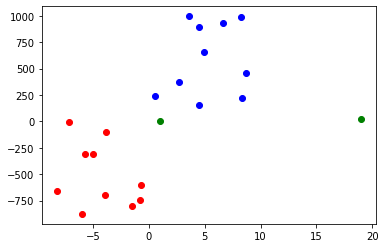

In [429]:
plt.scatter(X[y[:,0]==0,0],X[y[:,0]==0,1],color='red')
plt.scatter(X[y[:,0]==1,0],X[y[:,0]==1,1],color='blue')
plt.scatter(x[0,0],x[0,1],color='green')
plt.scatter(x[1,0],x[1,1],color='green')